In [22]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt 
from pyMCDS import pyMCDS
from scipy.integrate import odeint

In [23]:
v = 1/60/60 # division rate per min
p = 0.8 # probabilty stays stem cell after division
t_total = 14400 # time min
alpha1 = 0.2
beta1  = 0.05
alpha2 = 0.2
beta2  = 0.05
c0     = 0

In [24]:
mcds = pyMCDS('output00000000.xml' , 'C:\\Users\zeXal\Desktop\stem_cells-master-1\stem_cells-master\output_therapy1')
all_type = mcds.data['discrete_cells']['cell_type']
cycle_models = mcds.data['discrete_cells']['cycle_model']

np.int( all_type[0] )


1

In [27]:
number_of_cells = all_type.shape[0]

def lepard( sugar ):
    print( 'pour some on me')
    
def count_live_cells( mcds ):
    all_type = mcds.data['discrete_cells']['cell_type']
    cycle_models = mcds.data['discrete_cells']['cycle_model']
    number_of_cells = np.int( all_type.shape[0] )
    live1_count = 0; 
    live2_count = 0; 
    for n in range( 0, number_of_cells ):
        cycle_model = np.int( cycle_models[n] );
        cell_type = np.int( all_type[n] );
        if( cycle_model < 100 ):
            if( cell_type == 1 ):
                live1_count += 1;
            if( cell_type == 2 ):
                live2_count +=1; 
    return live1_count, live2_count; 

In [28]:
live1, live2 = count_live_cells( mcds )
print( live1 )
print( live2 )

mcds = pyMCDS('output00000001.xml' , 'C:\\Users\zeXal\Desktop\stem_cells-master-1\stem_cells-master\output_therapy1')

live1, live2 = count_live_cells( mcds )
print( live1 )
print( live2 )

mcds = pyMCDS('output00000002.xml' , 'C:\\Users\zeXal\Desktop\stem_cells-master-1\stem_cells-master\output_therapy1')

live1, live2 = count_live_cells( mcds )
print( live1 )
print( live2 )


for n in range(0,10+1,2):
    print(n)
    
    



1122
76
1057
30
1122
76
0
2
4
6
8
10


In [45]:
def get_data_old(direc_lst,file_number,i):
    
    type1_matrix = np.zeros((len(direc_lst),file_number))
    type2_matrix = np.zeros((len(direc_lst),file_number))
    type3_matrix = np.zeros((len(direc_lst),file_number))
    time_matrix  = np.zeros((len(direc_lst),file_number))
    if i ==1:
        k =1
    else:
        k = len(direc_lst) 
    for j in range(20):    
        for i in range(1,file_number):
            if i>=10:
                new_str = str(i);
            else:
                new_str = '0'+str(i)
            my_str = 'output000000'+new_str +'.xml'
            mcds = pyMCDS(my_str,direc_lst[j])
            
            live1, live2 = count_live_cells( mcds )
            
            type1_matrix[j][i] = live1
            type2_matrix[j][i] = live2
            
            time_matrix[j][i]  = mcds.get_time()
    return type1_matrix,type2_matrix,time_matrix

def get_data(directory,first_index, increment, last_index):
    number_of_files = np.int( np.floor( (last_index-first_index)/increment)+1 );
    type1_matrix = np.zeros(number_of_files)
    type2_matrix = np.zeros(number_of_files)
    time_matrix  = np.zeros(number_of_files)
    for i in range( first_index, last_index+1 , increment ):
        # use python version of sprintf( 'output%08i.xml', i )
        if i>=10:
            new_str = str(i);
        else:
            new_str = '0'+str(i)
        my_str = 'output000000'+new_str +'.xml'
        mcds = pyMCDS(my_str,directory)
        live1, live2 = count_live_cells( mcds )
        type1_matrix[i] = live1
        type2_matrix[i] = live2
        time_matrix[i]  = mcds.get_time()
    return type1_matrix,type2_matrix,time_matrix

def plot_data(type1_matrix,type2_matrix,time_matrix):
    plt.plot(time_matrix,type1_matrix,'bo-',label='CSC')
    plt.plot(time_matrix,type2_matrix,'ro-',label='DCC')
    plt.plot(time_matrix,type2_matrix+type1_matrix,'go-',label='total')
    plt.legend()
    plt.xlim(0, 15000)
    plt.xlabel('figure {}'.format(1))
    plt.ylim(0,8000)
# ODE model


def plot_multiple_old(type1_matrix,type2_matrix,time_matrix,file_index):
    i = file_index
    plt.plot(time_matrix[i,:],type1_matrix[i,:],'bo-',label='CSC')
    plt.plot(time_matrix[i,:],type2_matrix[i,:],'ro-',label='DCC')
    plt.plot(time_matrix[i,:],type2_matrix[i,:]+type1_matrix[i,:],'go-',label='total')
    plt.legend()
    plt.xlim(0, 15000)
    plt.xlabel('figure {}'.format(i+1))
    plt.ylim(0,8000)
# ODE model

def model(z,t):
    dxdt =   v*z[0]*(2*p-1)
    dydt = 2*v*z[0]*(1-p)  + v*z[1]
    dzdt = [dxdt,dydt]
    return dzdt

def solv_ode45(z0,t_total):
    # time points
    t = np.linspace(0,t_total,np.floor(t_total/t_one_day*10000))
     # solve ODE
    z = odeint(model,z0,t)             
    return z[:,0],z[:,1],t

def plot_ode45(xl,yl,t):
    # plot results
    plt.plot(t,xl,'b-',label=r'CSC')
    plt.plot(t,yl,'r-',label=r'DCC')
    plt.plot(t,xl+yl,'g-',label=r'total')
    plt.ylabel('cell number')
    plt.xlabel('time')
    plt.legend(loc='best')
    plt.title('ODE model for Cell number no feedback and dedifferention')

def apply_radio_therapy(x,y,d):
    x = x[-1]
    y = y[-1]
    x = x*np.exp(-alpha1*d-beta1*(d^2))+c0*d*y
    y = y*np.exp(-alpha2*d-beta2*(d^2))-c0*d*y
    z = [x,y]
    return z

def one_thearpy(u_lst,v_lst,t_elpse):
    z0  = apply_radio_therapy(u_lst,v_lst,d)
    u_lst[-1] = z0[0]
    v_lst[-1] = z0[1]
    return u_lst,v_lst,t_elpse

def one_growth(u_lst,v_lst,t_elpse,t_mean):
    z0 =[u_lst[-1],v_lst[-1]]
    xl,yl,t = solv_ode45(z0,t_mean)
    t_elpse += t_mean
    u_lst = np.append(u_lst,xl)
    v_lst = np.append(v_lst,yl)
    return u_lst,v_lst,t_elpse

def one_week_thearpy(u_lst,v_lst,t_elpse):
    for i in range(5):
        z0  = apply_radio_therapy(u_lst,v_lst,d)
        xl,yl,t = solv_ode45(z0,t_one_day)
        t_elpse += t_one_day
        u_lst = np.append(u_lst,xl)
        v_lst = np.append(v_lst,yl)
    z0 =[u_lst[-1],v_lst[-1]]
    xl,yl,t = solv_ode45(z0,2*t_one_day)
    t_elpse += 2*t_one_day
    u_lst = np.append(u_lst,xl)
    v_lst = np.append(v_lst,yl)
    return u_lst,v_lst,t_elpse

def model_feedback(z,t):
    dxdt =   (v/(1+h*z[2]^k))*z[0]*(2*(p/(1+l*z[2]^n))-1)
    dydt = 2*(v/(1+h*z[2]^k))*z[0]*(1-(p/(1+l*z[2]^n)))    + (v/(1+h*z[2]^k))*z[1]
    dcdt =                                                            lambdal*z[1]
    dzdt = [dxdt,dydt,dcdt]
    return dzdt


C:\Users\zeXal\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


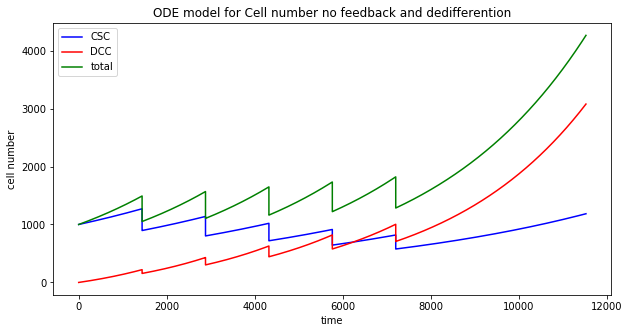

In [46]:
# without feedback
# initial condition
z0 = [1000,0]
d  = 1
t_one_day = 24*60
t_before_thearpy = 24*60
t_elpse = 0
u_lst = []
v_lst = []
# solve ODE
plt.figure(figsize=(10,5))
xl,yl,t = solv_ode45(z0,t_before_thearpy)
t_elpse += t_before_thearpy
u_lst = np.append(u_lst,xl)
v_lst = np.append(v_lst,yl)
u_lst,v_lst,t_elpse = one_week_thearpy(u_lst,v_lst,t_elpse)
plot_ode45(u_lst,v_lst,t = np.linspace(0,t_elpse,len(u_lst)))



In [47]:
direc_lst    = ('C:\\Users\zeXal\Desktop\stem_cells-master-1\stem_cells-master\output_therapy1',
                'C:\\Users\zeXal\Desktop\stem_cells-master-1\stem_cells-master\output_therapy2',
                'C:\\Users\zeXal\Desktop\stem_cells-master-1\stem_cells-master\output_therapy3') 

type1_matrix,type2_matrix,time_matrix=get_data(direc_lst,20,2)

TypeError: get_data() missing 1 required positional argument: 'last_index'

In [ ]:
f = plt.figure(figsize=(16,10))
ax = f.add_subplot(221)
plot_ode45(u_lst,v_lst,t = np.linspace(0,t_elpse,len(u_lst)))
plt.ylim(0,8000)
plt.xlim(0,14000)
ax = f.add_subplot(222)
plot_data(type1_matrix,type2_matrix,time_matrix,0)
plt.title('Physicell simulation 1' )
ax = f.add_subplot(223)
plot_data(type1_matrix,type2_matrix,time_matrix,1)
plt.title('Physicell simulation 2' )
ax = f.add_subplot(224)
plot_data(type1_matrix,type2_matrix,time_matrix,2)
plt.title('Physicell simulation 3' )
plt.show()

In [48]:
z0 = [1000,0]
d  = 1
t_one_day = 24*60
t_before_thearpy = 6*60
t_elpse = 0
u_lst = []
v_lst = []
# solve ODE
xl,yl,t = solv_ode45(z0,t_before_thearpy)
t_elpse += t_before_thearpy
u_lst = np.append(u_lst,xl)
v_lst = np.append(v_lst,yl)
t_mean = 360
u_lst,v_lst,t_elpse = one_thearpy(u_lst,v_lst,t_elpse)
u_lst,v_lst,t_elpse = one_growth(u_lst,v_lst,t_elpse,t_mean)
u_lst,v_lst,t_elpse = one_thearpy(u_lst,v_lst,t_elpse)
t_mean = 720
u_lst,v_lst,t_elpse = one_growth(u_lst,v_lst,t_elpse,t_mean)
print('total final is around {}'.format(u_lst[-1]+v_lst[-1]))

total final is around 740.8182209307201


C:\Users\zeXal\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


In [49]:
direc_lst    = ('C:\\Users\zeXal\Downloads\stem_cells-master (1)\stem_cells-master\output',
                'C:\\Users\zeXal\Downloads\stem_cells-master (1)\stem_cells-master\output')
type1_matrix,type2_matrix,time_matrix=get_data(direc_lst,15,1)

TypeError: get_data() missing 1 required positional argument: 'last_index'

In [50]:
n

10

Text(0.5, 1.0, 'Initial 20000 cells two thearpy in a week')

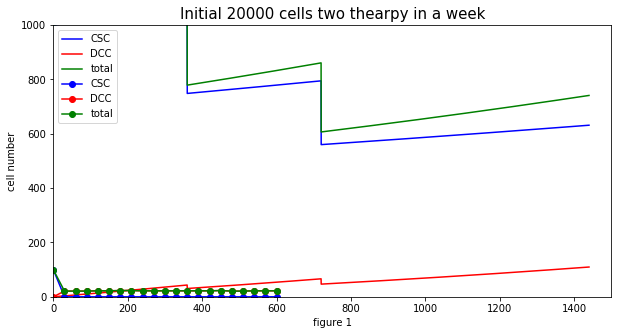

In [52]:
type1_matrix,type2_matrix,time_matrix=get_data('C:\\Users\zeXal\Downloads\stem_cells-master (1)\stem_cells-master\output' , 0, 1, 20 )

plt.figure(figsize=(10,5))
plot_ode45(u_lst,v_lst,t = np.linspace(0,t_elpse,len(u_lst)))
plot_data(type1_matrix,type2_matrix,time_matrix)
plt.xlim(0,1500)
plt.ylim(0,1000)
plt.title('Initial 20000 cells two thearpy in a week',fontsize = 15)

In [ ]:
t = np.linspace(0,t_elpse,len(u_lst))
print(t)

In [ ]:
direc_lst    = ('C:\\Users\zeXal\Desktop\stem_cells_paul _yushang\stem_cells-master\output_fix_10_60_1',
                'C:\\Users\zeXal\Desktop\stem_cells_paul _yushang\stem_cells-master\output_sto_10_60',
                'C:\\Users\zeXal\Desktop\stem_cells_paul _yushang\stem_cells-master\output_sto_10_60_2',
                'C:\\Users\zeXal\Desktop\stem_cells_paul _yushang\stem_cells-master\output_sto_10_60_3')
type1_matrix = np.zeros((len(direc_lst),41))
type2_matrix = np.zeros((len(direc_lst),41))
type3_matrix = np.zeros((len(direc_lst),41))
time_matrix  = np.zeros((len(direc_lst),41))

In [ ]:
for j in range(len(direc_lst)):    
    for i in range(1,41):
        if i>=10:
            new_str = str(i);
        else:
            new_str = '0'+str(i)
        my_str = 'output000000'+new_str +'.xml'
        mcds = pyMCDS(my_str,direc_lst[j])
        all_type = mcds.data['discrete_cells']['cell_type']
        type1_matrix[j][i] = sum(all_type==1)
        type2_matrix[j][i] = sum(all_type==2)
        time_matrix[j][i]  = mcds.get_time()

In [ ]:
plt.figure(figsize=(16,12))
title_lst = ('fix duration for division rate 1/60h 10 days',
             'stocastic duration for division rate 1/60h 10 days first',
             'stocastic duration for division rate 1/60h 10 days second',
             'stocastic duration for division rate 1/60h 10 days thrid')
for i in range(4):
    plt.subplot(2,3,i+1)
    plt.plot(time_matrix[i,:],type1_matrix[i,:],'bo-',label='type1 number')
    plt.plot(time_matrix[i,:],type2_matrix[i,:],'ro-',label='type2 number')
    plt.plot(time_matrix[i,:],type2_matrix[i,:]+type1_matrix[i,:],'go-',label='total number')
    plt.legend()
    plt.title(title_lst[i])
    plt.xlim(0, 15000)
    plt.xlabel('figure {}'.format(i+1))
    plt.ylim(0,18000)
v = 1/60/60 # division rate per min
p = 0.8 # probabilty stays stem cell after division
t_total = 14400 # time min
for i in range(2):
    z = odeint(model,z0,t)
    plt.subplot(2,3,i+5)
    plt.plot(t,z[:,0],'b-',label=r'CSC')
    plt.plot(t,z[:,1],'r-',label=r'DCC')
    plt.plot(t,z[:,1]+z[:,0],'g-',label=r'total')
    plt.ylabel('cell number')
    plt.xlabel('figure {}'.format(i+5))
    plt.legend(loc='best')
    plt.xlim(0, 15000)
    plt.ylim(0,18000) 
    if i ==0:
        plt.title('ODE model for Cell number')
    else:
        plt.title('ODE model for Cell number rate*=ln(2)')
    v = v*np.log(2)

Figure 1 is the fixed duration for average duration 60 hours = 3600mins and totoal time for 10 days = 14400 mins.

Figure 2,3,4 are the is the stochastic duration for average duration 60 hours = 3600mins and totoal time for 10 days = 14400 mins.

Figure 5 is the ode model as professor lowengrub derive last time.

Figure 6 is the preious ode model which I multiply the division rate by Ln(2).

From 1,6， we can see that fixed duation is pretty agree with the ode model which division rate multiply by Ln(2).

From 2,3,4 vs 5 we can see that stochastic duration model are pretty agree with the model derived before.

I'm a little confused about those results. Could you help me with these?